In [1]:
from floater import generators
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

from xmitgcm import open_mdsdataset
import xarray as xr

/home/as4479/.local/lib/python2.7/site-packages/xarray-0.9.5-py2.7.egg/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [3]:
import pandas as pd

In [2]:
outdir = '/data/scratch/as4479/agulhas_llc_4320_data/'

# New Floatset with 1/100, 1/200 and and 1/20 deg particle grid spacing#

In [8]:
fs = generators.FloatSet(xlim=(-15.5, 29.0), ylim=(-56.0, -27.0), dx=0.01, dy =0.01)
fs.to_mitgcm_format('/swot/SUM02/as4479/flt_ini_pos_1_100_s3.bin',iup=-1, mesh='rect', read_binary_prec=32)
fs.to_mitgcm_format('/swot/SUM02/as4479/flt_ini_pos_1_100_s2.bin', mesh='rect', read_binary_prec=32)
fs.to_pickle('/swot/SUM02/as4479/floatset_1_100.pkl')



In [9]:
fs = generators.FloatSet(xlim=(-15.5, 29.0), ylim=(-56.0, -27.0), dx=0.005, dy =0.005)
fs.to_mitgcm_format('/swot/SUM02/as4479/flt_ini_pos_1_200_s3.bin',iup=-1, mesh='rect', read_binary_prec=32)
fs.to_mitgcm_format('/swot/SUM02/as4479/flt_ini_pos_1_200_s2.bin', mesh='rect', read_binary_prec=32)
fs.to_pickle('/swot/SUM02/as4479/floatset_1_200.pkl')



In [12]:
fs = generators.FloatSet(xlim=(-15.5, 29.0), ylim=(-56.0, -27.0), dx=0.05, dy =0.05)
fs.to_mitgcm_format('/swot/SUM02/as4479/flt_ini_pos_1_20_s3.bin',iup=-1, mesh='rect', read_binary_prec=32)
fs.to_mitgcm_format('/swot/SUM02/as4479/flt_ini_pos_1_20_s2.bin', mesh='rect', read_binary_prec=32)
fs.to_pickle('/swot/SUM02/as4479/floatset_1_20.pkl')



In [5]:
ds = xr.open_dataset('/data/scratch/as4479/llc_4320_agulhas_grid.nc')
ds


<xarray.Dataset>
Dimensions:  (i: 2160, i_g: 2160, j: 2160, j_g: 2160, k: 90, k_l: 90, k_p1: 91, k_u: 90)
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g      (j_g) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i        (i) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
  * j        (j) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i_g      (i_g) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
    face     int64 1
    YC       (j, i) float32 -57.001 -57.001 -57.001 -57.001 -57.001 -57.001 ...
    YG       (j_g, i_g) float32 -57.0066 -57.0066 -57.0066 -57.0066 -57.0066 ...
    XC       (j, i) float32 -15.4896 -15.4688 -15.4479 -15.4271 -

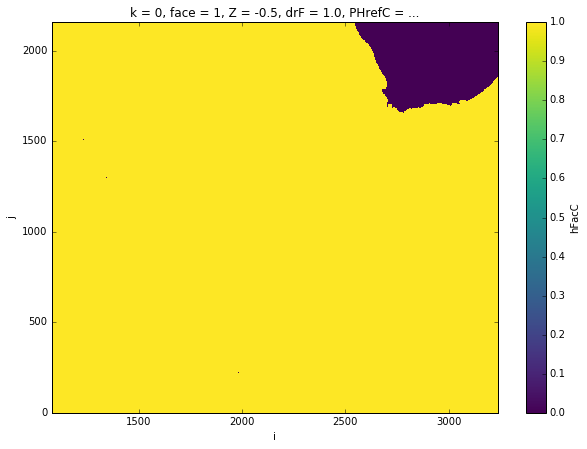

In [4]:
fig = plt.figure(figsize=(10,7))
ds.hFacC[0].plot()

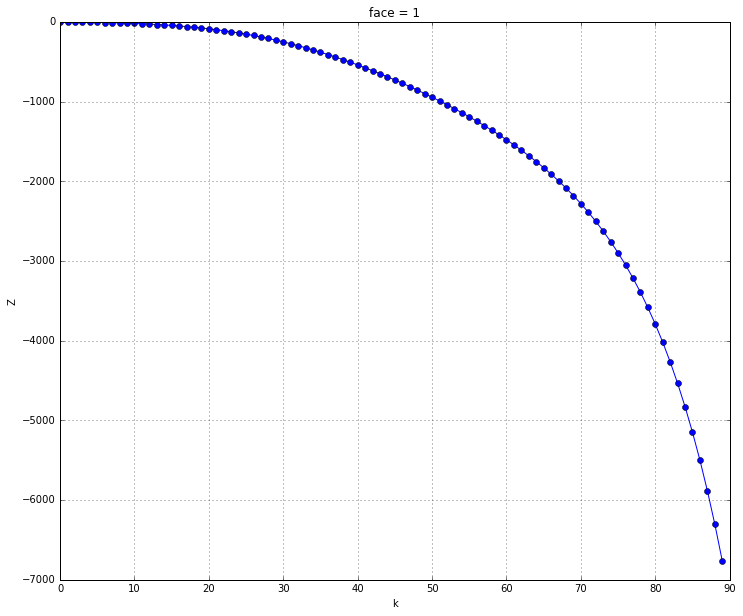

In [6]:
plt.figure(figsize=(12,10))

ds.Z.plot(marker='o',linestyle='-')
plt.grid()

In [5]:
fs = generators.FloatSet(xlim=(-15.5, 29.0), ylim=(-56.0, -27.0), dx=0.02, dy =0.02)
fs.to_mitgcm_format('/swot/SUM02/as4479/flt_ini_pos_rect_s3.bin',iup=-1, mesh='rect', read_binary_prec=32)
fs.to_mitgcm_format('/swot/SUM02/as4479/flt_ini_pos_rect_s2.bin', mesh='rect', read_binary_prec=32)

In [7]:
fs.to_pickle('/swot/SUM02/as4479/floatset.pkl')

(-55.990002, 0.0)

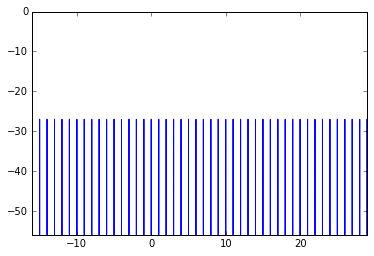

In [57]:
floats = np.fromfile(outdir+'flt_ini_pos_rect_s3.bin', dtype='>f4')
total_num = len(floats)
float_num = total_num//9

floats.shape = (float_num, 9)

x = floats[:, 2]
y = floats[:, 3]
plt.scatter(x[::100], y[::100], edgecolor='none', s=1)
plt.xlim([min(x),max(x)])
plt.ylim([min(y),max(y)])

In [46]:
floats = np.fromfile(outdir+'flt_ini_pos_rect_s3.bin', dtype='>f4')
total_num = len(floats)
float_num = total_num//9

floats.shape = (float_num, 9)

x = floats[:, 2]
y = floats[:, 3]
min(y),max(y)

(-55.990002, 0.0)

In [82]:
lon_1 = ds.XC.values[0]
lat_1 = ds.YC.values[:,0]

lon = lon_1[::5]
lat = lat_1[::5]


land_mask_1 = ds.hFacC[0].values==1
land_mask = land_mask_1[::5,::5]


model_grid = {'lon': lon, 'lat': lat, 'land_mask': land_mask}

In [83]:
fs = generators.FloatSet(xlim=(-16, 29), ylim=(-56, -27), dx=0.02, dy =0.02, model_grid=model_grid)
fs.Nx, fs.Ny

(2250, 1450)

In [65]:

fs.to_mitgcm_format('/swot/SUM02/as4479/flt_ini_pos_s2_mask_1.bin', mesh='rect', read_binary_prec=32)

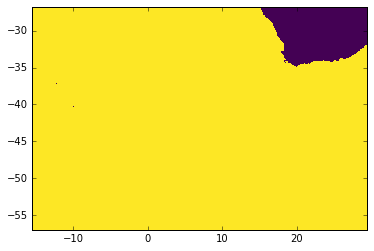

In [68]:
plt.pcolormesh(model_grid['lon'], model_grid['lat'], model_grid['land_mask'], cmap='viridis')
plt.xlim([model_grid['lon'].min(), model_grid['lon'].max()]);
plt.ylim([model_grid['lat'].min(), model_grid['lat'].max()]);

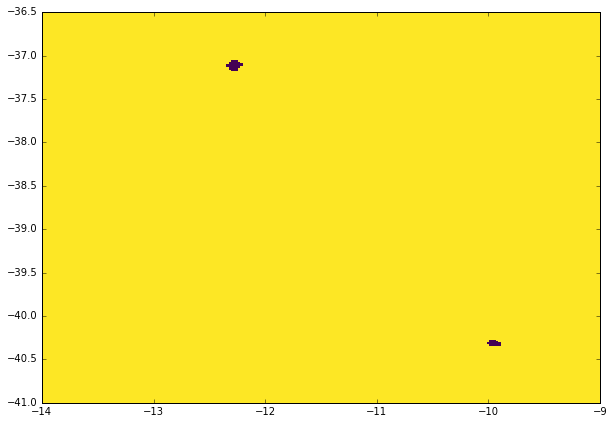

In [78]:
lon = lon_1[::1]
lat = lat_1[::1]


land_mask_1 = ds.hFacC[0].values==1
land_mask = land_mask_1[::1,::1]


model_grid = {'lon': lon, 'lat': lat, 'land_mask': land_mask}
plt.figure(figsize=(10,7))
plt.pcolormesh(model_grid['lon'], model_grid['lat'], model_grid['land_mask'], cmap='viridis')
plt.xlim([-14, -9]);
plt.ylim([-41, -36.5]);